In [3]:
import os
import json
import re
import string
import random
import time
import datetime

import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from argparse import Namespace
from tqdm import tqdm

import matplotlib.pyplot as plt 

from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [ ]:
df = pd.read_csv('./processed_data/sentences,csv')
print(len(df))

## Pre-process LEDGAR DATA 

In [1]:
filepath = './processed_data/LEDGAR_2016-2019_clean.jsonl'

In [6]:
ledg_df = pd.read_json(filepath, lines=True)[0:15000]


In [7]:
unique_topics = set(topic for sublist in ledg_df['label'] for topic in sublist)
num_unique_topics = len(unique_topics)
print(num_unique_topics)

4459


In [21]:
x = ledg_df['source'].tolist()
x.reverse()

In [22]:
type(list(x))

list

In [ ]:
sorted_array = {}

In [75]:
ledg_df['label'] = ledg_df['label'].str[0]

In [76]:
ledg_df.head()

,provision,label,source
0,Section and Subsection headings in this Amendm...,headings,2019/QTR1/000119312519044328/d691151dex101.htm
1,THIS AMENDMENT AND THE RIGHTS AND OBLIGATIONS ...,applicable laws,2019/QTR1/000119312519044328/d691151dex101.htm
2,This Amendment may be executed in any number o...,counterparts,2019/QTR1/000119312519044328/d691151dex101.htm
3,The execution and delivery of this Amendment b...,binding effects,2019/QTR1/000119312519044328/d691151dex101.htm
4,Each of the parties hereto irrevocably waives ...,waiver of jury trials,2019/QTR1/000119312519044328/d691151dex101.htm


In [77]:
ledg_df.to_csv('ir_data.csv')

In [8]:
ledg_df.head()

,provision,label,source
0,Section and Subsection headings in this Amendm...,[headings],2019/QTR1/000119312519044328/d691151dex101.htm
1,THIS AMENDMENT AND THE RIGHTS AND OBLIGATIONS ...,[applicable laws],2019/QTR1/000119312519044328/d691151dex101.htm
2,This Amendment may be executed in any number o...,[counterparts],2019/QTR1/000119312519044328/d691151dex101.htm
3,The execution and delivery of this Amendment b...,[binding effects],2019/QTR1/000119312519044328/d691151dex101.htm
4,Each of the parties hereto irrevocably waives ...,[waiver of jury trials],2019/QTR1/000119312519044328/d691151dex101.htm


In [12]:
ledg_df.columns

Index(['provision', 'label', 'source'], dtype='object')

In [10]:
tokenizer = AutoTokenizer.from_pretrained('casehold/legalbert')

828198


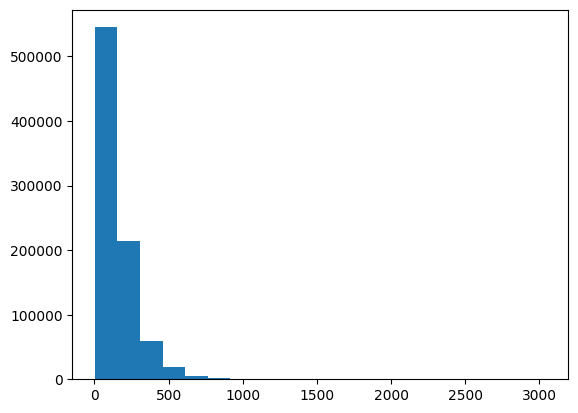

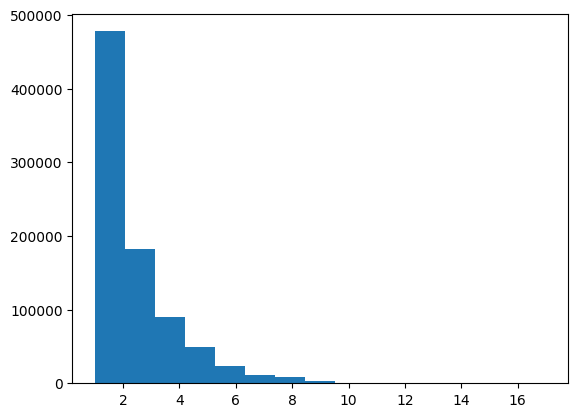

In [17]:
lengths1 = []
lengths2 = []
count = 0
for idx, row in ledg_df.iterrows():
    tokens1 = tokenizer.tokenize(row['provision'])
    tokens2 = tokenizer.tokenize(row['label'][0])
    lengths1.append(len(tokens1))
    lengths2.append(len(tokens2))
    if len(tokens1) <= 512 and len(tokens2) <= 512:
        count += 1


print(count) 


plt.hist(lengths1, bins=20)
plt.show()

plt.hist(lengths2, bins=15)
plt.show()

# Pre-process privacy Q/A 


In [26]:
qa_df = pd.read_csv('./raw_data/ir_data/privacy_policy/policy_train_data.csv', sep='\t')

In [31]:
qa_df.head()

,Folder,DocID,QueryID,SentID,Split,Query,Segment,Label
0,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_0,train,do you keep the data of mine and upload to you...,"This privacy policy, with our Terms of Servic...",Irrelevant
1,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_1,train,do you keep the data of mine and upload to you...,We encourage you to read this privacy policy c...,Irrelevant
2,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_2,train,do you keep the data of mine and upload to you...,By using our application or other online servi...,Irrelevant
3,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_3,train,do you keep the data of mine and upload to you...,"When we post changes to this privacy policy, ...",Irrelevant
4,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_4,train,do you keep the data of mine and upload to you...,We encourage you to review this privacy policy...,Irrelevant


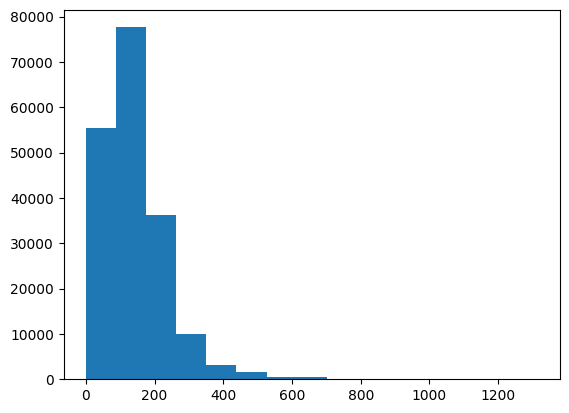

In [23]:
lengths = []
for idx, row in qa_df.iterrows():
    lengths.append(len(row['Segment']))

plt.hist(lengths, bins=15)
plt.show()

In [35]:
print(len(qa_df))

185200


## Casehgold DF

In [26]:
df = pd.read_csv('./processed_data/casehold_processed.csv')

In [27]:
df.head(
    
)

,Unnamed: 0,context,holding,binary_label,relevance_label
0,0,"Drapeau’s cohorts, the cohort would be a “vict...",holding that possession of a pipe bomb is a cr...,1,1.000
1,1,"Drapeau’s cohorts, the cohort would be a “vict...",holding that bank robbery by force and violenc...,0,0.652
2,2,"Drapeau’s cohorts, the cohort would be a “vict...",holding that sexual assault of a child qualifi...,0,0.647
3,3,"Drapeau’s cohorts, the cohort would be a “vict...",holding for the purposes of 18 usc 924e that ...,0,0.670
4,4,"Drapeau’s cohorts, the cohort would be a “vict...",holding that a court must only look to the sta...,0,0.639


In [19]:
print(len(df))

52857
